# <center> Классификация рукописных цифр
<img src='imgs/mnist_examples.png' width=80%>

# Подготовка

#### Импортируем библиотеки

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import torch
from source.network import NNClassifier
from source.helpme import show_history, show_image, load_mnist
import numpy as np

#### Загрузим датасет

In [8]:
X, y = load_mnist(shape='vector') # X - картинки, y - ответы (классы)

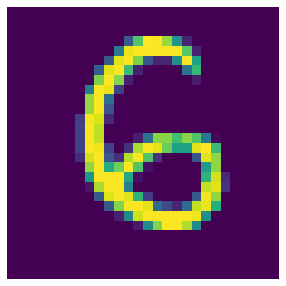

In [11]:
# посмотрим как выглядит картинка (преобразовав вектор в матрицу)
show_image(X[50004])

In [13]:
# а вот как выглядит та же картинки в виде вектора (раскоментируйте следующую строку)
# print(X[0])

In [14]:
# посмотрим какие размерности у наших данных
print(X.shape, y.shape)

(70000, 784) (70000,)


# Полносвязная нейросеть (1 слой)

In [67]:
one_layer_net = torch.nn.Sequential(torch.nn.Linear(28*28, 10))

<br>
Используем класс NNClassifier, который имеет следующие методы:
- **fit(X, y, epochs, batch_size, valid_data)** - обучает нейросеть
- **predict_proba(X, batch_size)** - предсказывает вероятности
- **predict(X, batch_size)** - предсказывает к какому классу относится каждый объект
- **evaluate_score(X, y, batch_size)** - возвращает долю угаданных объектов
- **loss(X, y, batch_size)** - рассчитывает ошибку
<br>
<br>
<br>
*batch_size* - это количество данных, которые нейросеть обрабатывает за один раз<br>
*valid_data* - это данные для валидации работы нейросети

In [68]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)
model_1 = NNClassifier(one_layer_net, lr=1e-4)

In [79]:
# разобьем датасет на три части: тренировочная, валидационная и тестовая
X_train = X[:19000]
y_train = y[:19000]

X_valid = X[19000:19500]
y_valid = y[19000:19500]

X_test = X[-50000:]
y_test = y[-50000:]

In [70]:
# обучим нейросеть на тренировочных данных, фиксируя результат классификации на валидационной части датасета
model_1.fit(X_train, y_train, epochs=20, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

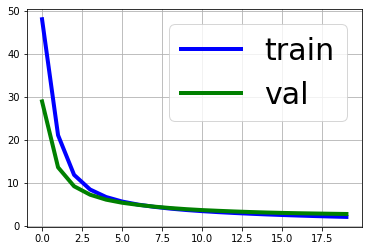

In [71]:
# посмотрим на графики ошибок на тренировочной и валидационной частях
show_history(model_1.train_history, model_1.valid_history)

In [72]:
# посмотрим на долю правильных ответов
acc = model_1.evaluate_score(X_test, y_test)

print("Правильно угадано %d%% картинок" % (int(acc * 100)))

Правильно угадано 83% картинок


# Полносвязная нейросеть (2 слоя)

In [22]:
two_layer_net = torch.nn.Sequential(torch.nn.Linear(28*28, 128),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(128, 10))

In [23]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)
model_2 = NNClassifier(two_layer_net, lr=1e-4)

In [24]:
# обучим нейросеть на тренировочных данных, фиксируя результат классификации на валидационной части датасета
model_2.fit(X_train, y_train, epochs=75, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

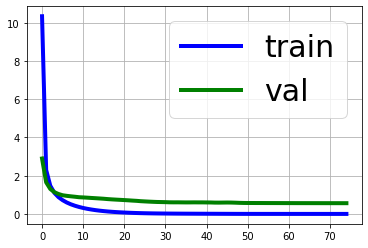

In [25]:
# посмотрим на графики ошибок на тренировочной и валидационной частях
show_history(model_2.train_history, model_2.valid_history)

In [26]:
# посмотрим на процент долю ответов
acc = model_2.evaluate_score(X_test, y_test)

print("Правильно угадано %d%% картинок" % (int(acc * 100)))

Правильно угадано 91% картинок


# Полносвязная нейросеть (3 слоя)

In [49]:
three_layer_net = torch.nn.Sequential(torch.nn.Linear(28*28, 256),
                                    torch.nn.ReLU(),
                                    
                                    torch.nn.Linear(256, 512),
                                    torch.nn.ReLU(),
                                    
                                    torch.nn.Linear(512, 128),
                                    torch.nn.ReLU(),
                                      
                                    torch.nn.Linear(128, 10))

In [50]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)
model_3 = NNClassifier(three_layer_net, lr=1e-4)

In [51]:
# обучим нейросеть на тренировочных данных, фиксируя результат классификации на валидационной части датасета
model_3.fit(X_train, y_train, epochs=75, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

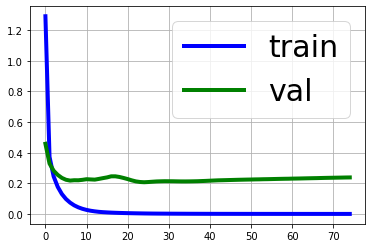

In [52]:
# посмотрим на графики ошибок на тренировочной и валидационной частях
show_history(model_3.train_history, model_3.valid_history)

In [53]:
# посмотрим на процент долю ответов
acc = model_3.evaluate_score(X_test, y_test)

print("Правильно угадано %d%% картинок" % (int(acc * 100)))

Правильно угадано 95% картинок


# Полносвязная нейросеть (3 слоя + Batch Normalization)

In [54]:
three_layer_net_bn = torch.nn.Sequential(
    torch.nn.Linear(28*28, 128),
    torch.nn.ReLU(), 
    torch.nn.BatchNorm1d(128),
                                    
    torch.nn.Linear(128, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
                                    
    torch.nn.Linear(128, 10))

In [55]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)
model_3_bn = NNClassifier(three_layer_net_bn, lr=1e-4)

In [56]:
# обучим нейросеть на тренировочных данных, фиксируя результат классификации на валидационной части датасета
model_3_bn.fit(X_train, y_train, epochs=75, batch_size=256)

A Jupyter Widget

In [57]:
# посмотрим на процент долю ответов
acc = model_3_bn.evaluate_score(X_test, y_test)

print("Правильно угадано %d%% картинок" % (int(acc * 100)))

Правильно угадано 94% картинок


# Ваша нейросеть

In [80]:
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    
    torch.nn.Linear(128, 10)
)

In [87]:
model = NNClassifier(net, lr=5e-5)

In [88]:
model.fit(X_train, y_train, epochs=10, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

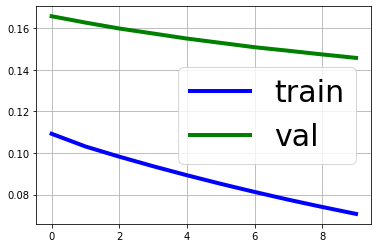

In [89]:
show_history(model.train_history, model.valid_history)

In [90]:
# посмотрим на процент долю ответов
acc = model.evaluate_score(X_test, y_test)

print("Правильно угадано %d%% картинок" % (int(acc * 100)))

Правильно угадано 95% картинок
